In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# Adult dataset path
adult_dataset_path = "/content/adult.csv"

In [2]:
# Function for loading adult dataset
def load_adult_data(adult_path=adult_dataset_path):
     csv_path = os.path.join(adult_path)
     return pd.read_csv(csv_path)

In [3]:
# Calling load adult function and assigning to a new variable df
df = load_adult_data()
# load top 3 rows values from adult dataset
df.head(3)

age  workclass  fnlwgt   education  educational-num      marital-status  \
0   25    Private  226802        11th                7       Never-married   
1   38    Private   89814     HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951  Assoc-acdm               12  Married-civ-spouse   

          occupation relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black   Male             0             0   
1    Farming-fishing      Husband  White   Male             0             0   
2    Protective-serv      Husband  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K

In [4]:
print ("Rows : " ,df.shape[0])
print ("Columns : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values : ", df.isnull().sum().values.sum())
print ("\nUnique values : \n",df.nunique())

Rows :  48842
Columns :  15

Features : 
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Missing values :  0

Unique values : 
 age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [7]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [8]:
# checking "?" total values present in particular 'workclass' feature
df_check_missing_workclass = (df['workclass']=='?').sum()
df_check_missing_workclass

2799

In [9]:
# checking "?" total values present in particular 'occupation' feature
df_check_missing_occupation = (df['occupation']=='?').sum()
df_check_missing_occupation

2809

In [10]:
# checking "?" values, how many are there in the whole dataset
df_missing = (df=='?').sum()
df_missing

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
percent_missing = (df=='?').sum() * 100/len(df)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [12]:
# find total number of rows which doesn't contain any missing value as '?'
df.apply(lambda x: x !='?',axis=1).sum()

age                48842
workclass          46043
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         46033
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     47985
income             48842
dtype: int64

In [13]:
# dropping the rows having missing values in workclass
df = df[df['workclass'] !='?']
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
5              30  United-States  <=50K

In [14]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
# checking whether any other column contains '?' value
df_categorical.apply(lambda x: x=='?',axis=1).sum()

workclass           0
education           0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
native-country    811
income              0
dtype: int64

In [15]:
from sklearn import preprocessing
# encode categorical variables using label Encoder
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

workclass     education      marital-status         occupation  \
0    Private          11th       Never-married  Machine-op-inspct   
1    Private       HS-grad  Married-civ-spouse    Farming-fishing   
2  Local-gov    Assoc-acdm  Married-civ-spouse    Protective-serv   
3    Private  Some-college  Married-civ-spouse  Machine-op-inspct   
5    Private          10th       Never-married      Other-service   

    relationship   race gender native-country income  
0      Own-child  Black   Male  United-States  <=50K  
1        Husband  White   Male  United-States  <=50K  
2        Husband  White   Male  United-States   >50K  
3        Husband  Black   Male  United-States   >50K  
5  Not-in-family  White   Male  United-States  <=50K

In [16]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

workclass  education  marital-status  occupation  relationship  race  \
0          3          1               4           7             3     2   
1          3         11               2           5             0     4   
2          1          7               2          11             0     4   
3          3         15               2           7             0     2   
5          3          0               4           8             1     4   

   gender  native-country  income  
0       1              39       0  
1       1              39       0  
2       1              39       1  
3       1              39       1  
5       1              39       0

In [17]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)
# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
5   34  198693                6             0             0              30   

   workclass  education  marital-status  occupation  relationship  race  \
0          3          1               4           7             3     2   
1          3         11               2           5             0     4   
2          1          7               2          11             0     4   
3          3         15               2           7             0     2   
5          3          0               4           8             1     4   

   gender  native-country  income  
0       1              39       0  
1       1              39       0  
2       1              39       1  
3       1              39       1  
5       1              39       0

In [18]:
# look at column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              46043 non-null  int64
 1   fnlwgt           46043 non-null  int64
 2   educational-num  46043 non-null  int64
 3   capital-gain     46043 non-null  int64
 4   capital-loss     46043 non-null  int64
 5   hours-per-week   46043 non-null  int64
 6   workclass        46043 non-null  int64
 7   education        46043 non-null  int64
 8   marital-status   46043 non-null  int64
 9   occupation       46043 non-null  int64
 10  relationship     46043 non-null  int64
 11  race             46043 non-null  int64
 12  gender           46043 non-null  int64
 13  native-country   46043 non-null  int64
 14  income           46043 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [19]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')
# check df info again whether everything is in right format or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              46043 non-null  int64   
 1   fnlwgt           46043 non-null  int64   
 2   educational-num  46043 non-null  int64   
 3   capital-gain     46043 non-null  int64   
 4   capital-loss     46043 non-null  int64   
 5   hours-per-week   46043 non-null  int64   
 6   workclass        46043 non-null  int64   
 7   education        46043 non-null  int64   
 8   marital-status   46043 non-null  int64   
 9   occupation       46043 non-null  int64   
 10  relationship     46043 non-null  int64   
 11  race             46043 non-null  int64   
 12  gender           46043 non-null  int64   
 13  native-country   46043 non-null  int64   
 14  income           46043 non-null  category
dtypes: category(1), int64(14)
memory usage: 5.3 MB


In [20]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
# Putting independent variables/features to X
X = df.drop('income',axis=1)
# Putting response/dependent variable/feature to y
y = df['income']

In [21]:
X.head(3)

age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   

   workclass  education  marital-status  occupation  relationship  race  \
0          3          1               4           7             3     2   
1          3         11               2           5             0     4   
2          1          7               2          11             0     4   

   gender  native-country  
0       1              39  
1       1              39  
2       1              39

In [22]:
y.head(3)

0    0
1    0
2    1
Name: income, dtype: category
Categories (2, int64): [0, 1]

In [23]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train.head()

age  fnlwgt  educational-num  capital-gain  capital-loss  \
32730   32  169589               11             0             0   
46688   34   35595               11             0             0   
13733   56  136164               10             0             0   
33162   24  304463               10             0             0   
12628   46  209739                9             0             0   

       hours-per-week  workclass  education  marital-status  occupation  \
32730              40          3          8               2           6   
46688              40          3          8               2          13   
13733              40          3         15               0           1   
33162              65          3         15               2           3   
12628              46          3         11               2           3   

       relationship  race  gender  native-country  
32730             0     4       1              39  
46688             0     4       1              39  
13733             1     4       0              39  
33162             0     4       1              39  
12628             0     4       1              39

In [24]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [25]:
# check the evaluation metrics of our default model
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# making predictions
y_pred_default = dt_default.predict(X_test)
# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     10430
           1       0.79      0.53      0.64      3383

    accuracy                           0.85     13813
   macro avg       0.83      0.74      0.77     13813
weighted avg       0.84      0.85      0.84     13813



In [26]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[9950  480]
 [1581 1802]]
0.8507927314848331


In [27]:
!pip install my-package

In [28]:
!pip install pydotplus

In [29]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
# Putting features
features = list(df.columns[1:])
features

['fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [30]:
!pip install graphviz

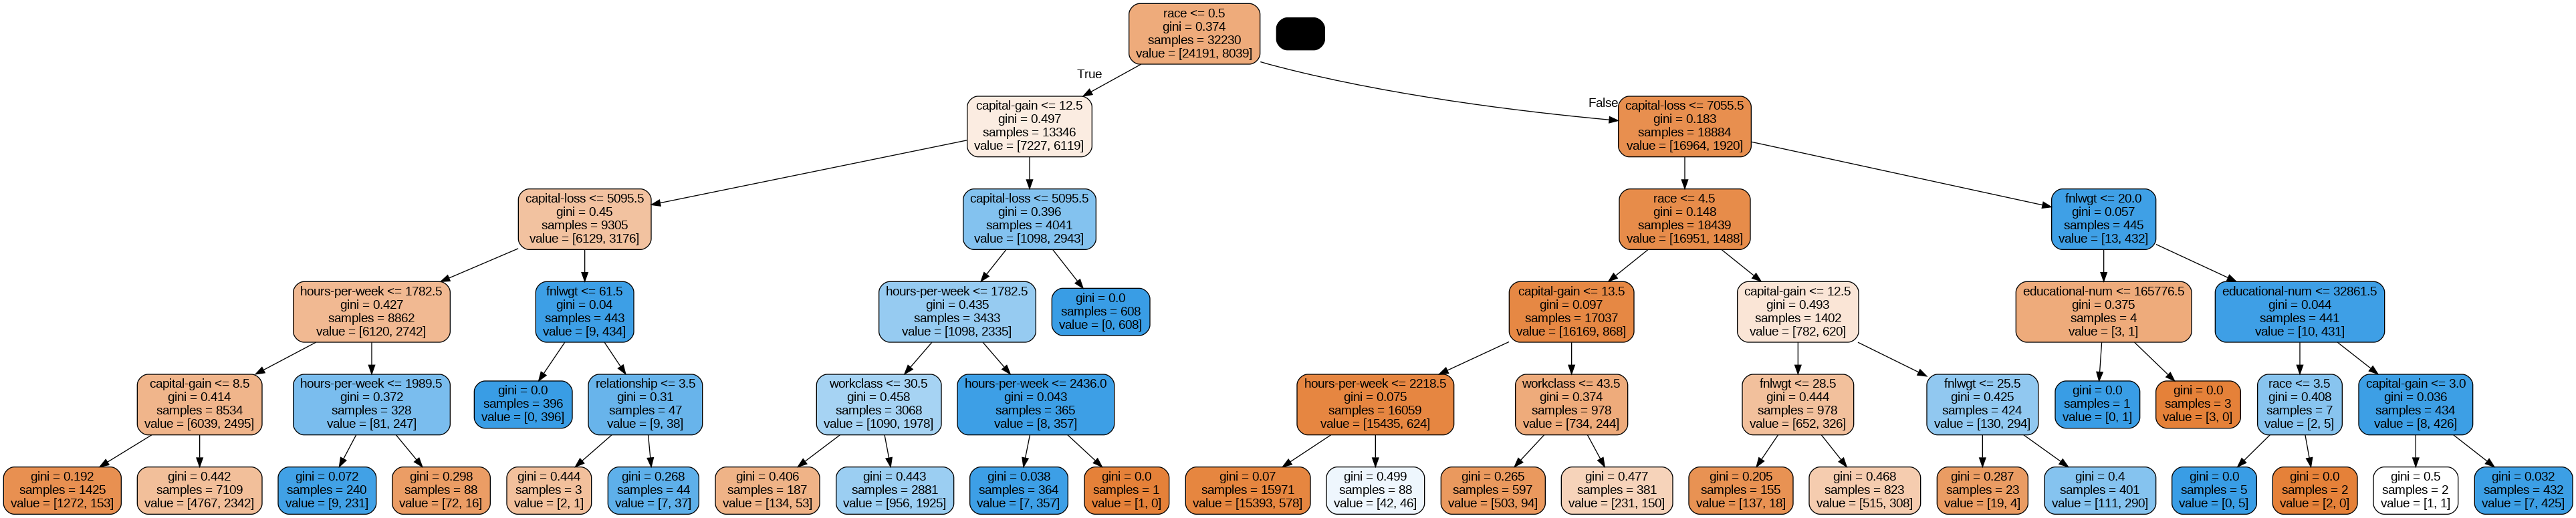

In [31]:
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
feature_names=features, filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [32]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 40)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [33]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.024534      0.006181         0.004718        0.000868   
1       0.030756      0.005364         0.004200        0.001048   
2       0.042313      0.005628         0.004536        0.001683   
3       0.047928      0.002828         0.004161        0.000369   
4       0.057720      0.003357         0.003905        0.000265   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.750543           0.750543   
1               2  {'max_depth': 2}           0.820974           0.822681   
2               3  {'max_depth': 3}           0.834316           0.835712   
3               4  {'max_depth': 4}           0.843159           0.841142   
4               5  {'max_depth': 5}           0.847037           0.848899   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.750543           0.750543           0.750698         0.750574   
1           0.816630           0.823301           0.820509         0.820819   
2           0.829196           0.837263           0.833540         0.834006   
3           0.833850           0.847037           0.843003         0.841638   
4           0.843003           0.852467           0.846882         0.847657   

   std_test_score  rank_test_score  
0        0.000062               39  
1        0.002336               19  
2        0.002719               13  
3        0.004341               10  
4        0.003076                7

In [34]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [35]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.141903      0.003672         0.004522        0.000132   
1       0.122223      0.008448         0.004218        0.000087   
2       0.108536      0.001409         0.004391        0.000600   
3       0.104253      0.003248         0.004580        0.000642   
4       0.098019      0.000970         0.004029        0.000050   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.829041   
1                     25  {'min_samples_leaf': 25}           0.844089   
2                     45  {'min_samples_leaf': 45}           0.848588   
3                     65  {'min_samples_leaf': 65}           0.850760   
4                     85  {'min_samples_leaf': 85}           0.849054   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.822215           0.821285           0.829972           0.827025   
1           0.848899           0.841917           0.850140           0.850140   
2           0.850760           0.840056           0.851536           0.853553   
3           0.848899           0.839901           0.852622           0.853863   
4           0.848278           0.845175           0.850760           0.850450   

   mean_test_score  std_test_score  rank_test_score  
0         0.825908        0.003538               10  
1         0.847037        0.003395                9  
2         0.848899        0.004698                6  
3         0.849209        0.004949                5  
4         0.848743        0.002001                7

In [36]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",
random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters,
cv=n_folds,
scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [37]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.226557      0.013352         0.006565        0.000431   
1       0.213040      0.006168         0.006226        0.000228   
2       0.144160      0.005122         0.004589        0.000508   
3       0.135408      0.002161         0.004481        0.000186   
4       0.137034      0.009988         0.004594        0.000315   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.813528   
1                      25  {'min_samples_split': 25}           0.834781   
2                      45  {'min_samples_split': 45}           0.841607   
3                      65  {'min_samples_split': 65}           0.845175   
4                      85  {'min_samples_split': 85}           0.846572   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.818337           0.811201           0.813217           0.821129   
1           0.829817           0.832144           0.828576           0.835867   
2           0.841762           0.834936           0.838349           0.840832   
3           0.845175           0.838504           0.843779           0.845951   
4           0.848588           0.838194           0.848588           0.847813   

   mean_test_score  std_test_score  rank_test_score  
0         0.815482        0.003669               10  
1         0.832237        0.002790                9  
2         0.839497        0.002588                8  
3         0.843717        0.002699                7  
4         0.845951        0.003948                6

In [38]:
# Create the parameter grid
param_grid = {
'max_depth': range(5, 15, 5),
'min_samples_leaf': range(50, 150, 50),
'min_samples_split': range(50, 150, 50),
'criterion': ["entropy", "gini"]
}
n_folds = 5

In [39]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid,
cv = n_folds, verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [40]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.061486      0.004628         0.004297        0.000742   
1        0.058399      0.001515         0.003645        0.000059   
2        0.059058      0.001948         0.003612        0.000059   
3        0.061181      0.003937         0.003770        0.000129   
4        0.098569      0.001851         0.004422        0.000701   
5        0.102699      0.004765         0.004241        0.000286   
6        0.097071      0.005475         0.004040        0.000211   
7        0.096971      0.004381         0.003946        0.000181   
8        0.053304      0.001540         0.003917        0.000505   
9        0.053649      0.000519         0.003737        0.000211   
10       0.054743      0.003072         0.004069        0.000737   
11       0.064305      0.009117         0.005006        0.000793   
12       0.133857      0.006504         0.006208        0.000919   
13       0.132267      0.003198         0.006003        0.000533   
14       0.128075      0.005468         0.005651        0.000458   
15       0.113889      0.013418         0.005355        0.001238   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.845641           0.848743           0.836333   
1            0.845641           0.848743           0.836333   
2            0.844710           0.847657           0.837263   
3            0.844710           0.847657           0.837263   
4            0.850295           0.848123           0.846416   
5            0.850295           0.848123           0.

In [41]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8506360533664287
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [42]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,
max_depth=10,
min_samples_leaf=50,
min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [43]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8543401143849997

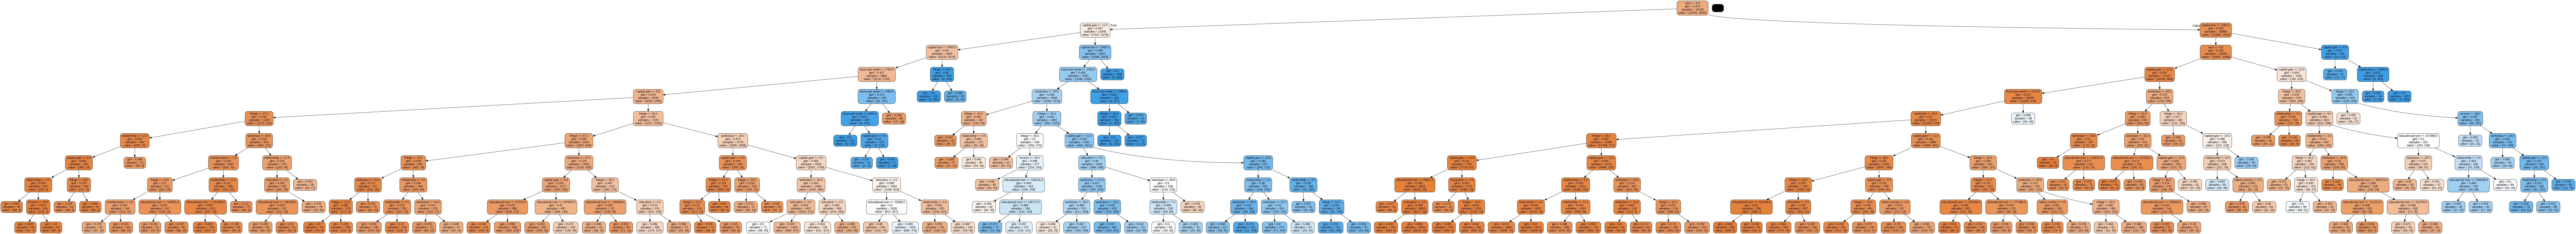

In [44]:
#plotting the tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini",
random_state = 100,
max_depth=3,
min_samples_leaf=50,
min_samples_split=50)
clf_gini.fit(X_train, y_train)
# score
print(clf_gini.score(X_test,y_test))
# plotting tree with max_depth=3
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

0.8376167378556433


In [46]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     10430
           1       0.77      0.48      0.59      3383

    accuracy                           0.84     13813
   macro avg       0.81      0.72      0.74     13813
weighted avg       0.83      0.84      0.82     13813

[[9956  474]
 [1769 1614]]
